# **Classification of Yoga poses**

Data Source : https://www.kaggle.com/datasets/shrutisaxena/yoga-pose-image-classification-dataset

Import Libraries

In [30]:
import os 
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from matplotlib.image import imread
import plotly.express as px 

In [31]:
tf.config.list_physical_devices()  # APU device is visible to TensorFlow.

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [35]:
base_dir = './dataset/'
print('Number of pose to be predicted: ',len(os.listdir(base_dir)))

Number of pose to be predicted:  107


In [36]:
class_dir = './dataset/janu sirsasana'


Data Visualization

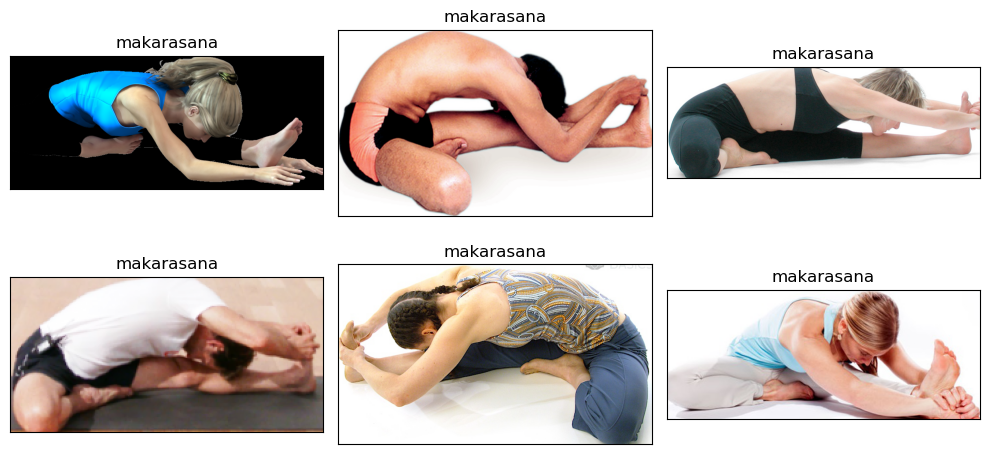

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(10,5), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(os.path.join(class_dir,os.listdir(class_dir)[i])))
    ax.set_title(os.listdir(base_dir)[1])
plt.tight_layout()
plt.show()


In [38]:
## count number of images in each class
DF = pd.DataFrame(columns=['class','count'])
DF['class']=pd.Series([os.listdir(base_dir)[x] for x in range(0,107)])
DF['count']=pd.Series([len(os.listdir(os.path.join(base_dir,os.listdir(base_dir)[x]))) for x in range(0,107)])


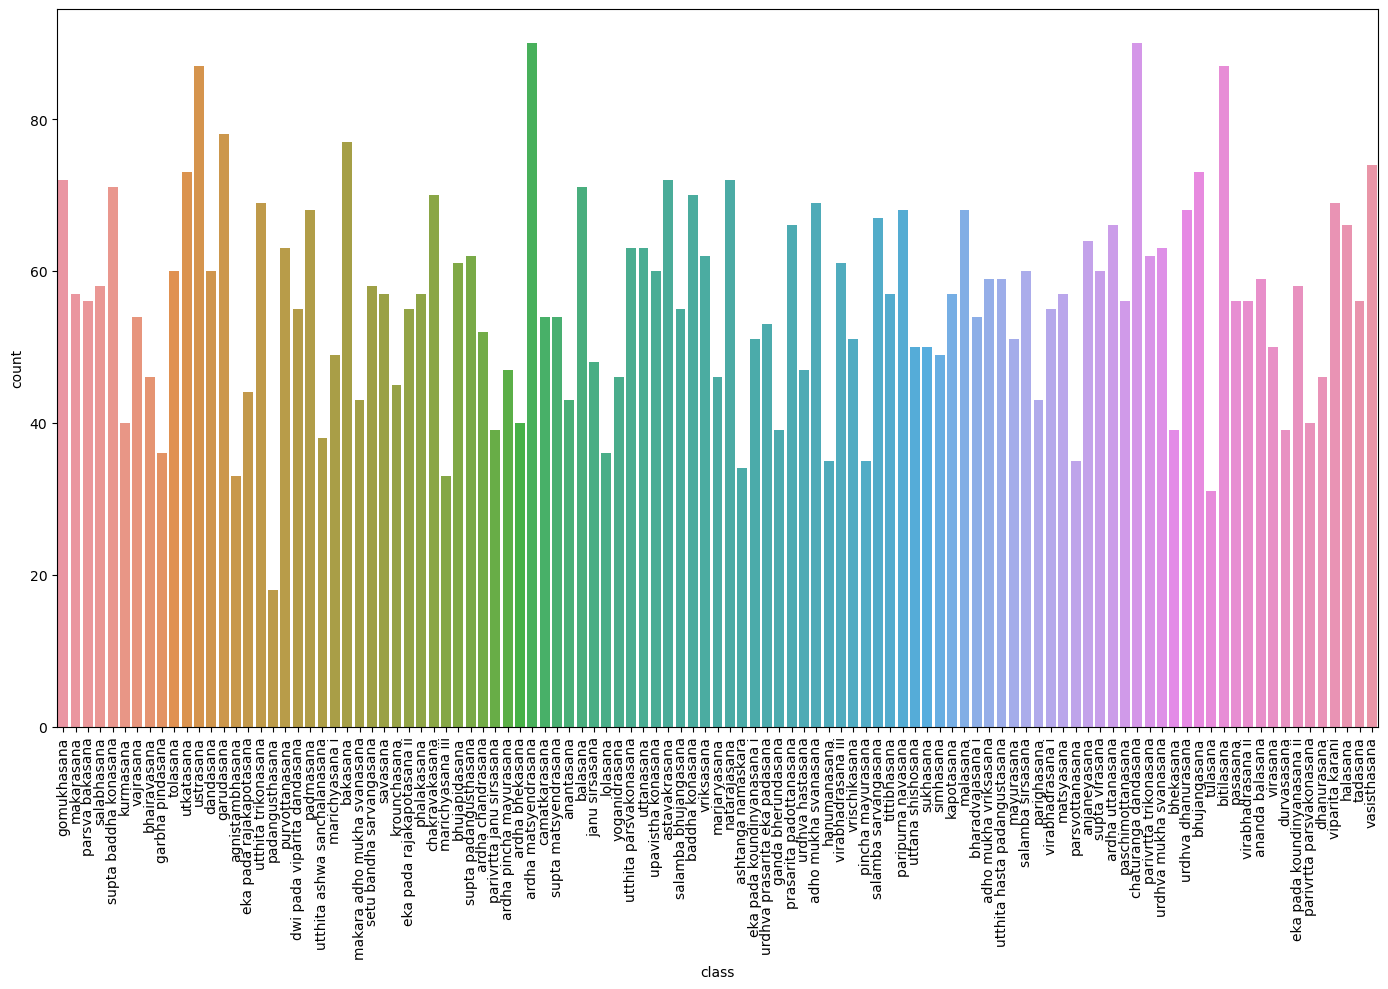

In [39]:
import seaborn as sns
plt.figure(figsize=(14,10))
g=sns.barplot(x='class', y='count',data=DF)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.tight_layout()

In [40]:
import plotly.express as px

fig = px.bar(DF, x='class', y='count')

fig.update_layout(
    xaxis_tickangle=-90,
    title="Bar Plot",
    xaxis_title="Class",
    yaxis_title="Count",
    width=800,
    height=600
)

fig.show()

| Yoga             | Pose              |
|--------------|--------------|
| Digestion   | janu sirsana| 
| Strength     | hatha yoga  |

# Simple CNN Model

Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  shear_range = 0.1,
                                  zoom_range= 0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest',
                                  validation_split=0.2)


In [ ]:
train_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training')

validation_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation')

Found 4835 images belonging to 107 classes.
Found 1156 images belonging to 107 classes.


In [ ]:
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, Conv2D
# covnet
model = tf.keras.models.Sequential([Conv2D(128,(3,3),input_shape=(224,224,3),activation='relu'),
                                   Conv2D(128,(3,3)),
                                   MaxPool2D(2,2),
                                   Conv2D(64,(3,3)),
                                   Conv2D(64,(3,3)),
                                   MaxPool2D(2,2),
                                   Conv2D(32,(3,3)),
                                   Conv2D(32,(3,3)),
                                   MaxPool2D(2,2),
                                   Flatten(),
                                   Dense(1024,activation='relu'),
                                   Dense(512,activation='relu'),
                                   Dense(107,activation='softmax')])


2022-01-26 11:12:15.554718: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-26 11:12:15.555932: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 11:12:15.557008: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 11:12:15.558005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [ ]:
#compile
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
with tf.device(tf.DeviceSpec(device_type="GPU", device_index='0')):
    history = model.fit(train_data, steps_per_epoch=120,validation_data=validation_data, validation_steps=35, epochs=25,verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.01,patience=3,restore_best_weights=True)])

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
2022-01-26 09:19:58.580601: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-01-26 09:20:00.722629: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


120/120 [==============================] - 123s 960ms/step - loss: 4.8935 - accuracy: 0.0123 - val_loss: 4.6096 - val_accuracy: 0.0241
Epoch 2/25
120/120 [==============================] - 90s 750ms/step - loss: 4.4679 - accuracy: 0.0407 - val_loss: 4.2696 - val_accuracy: 0.0571
Epoch 3/25
120/120 [==============================] - 84s 697ms/step - loss: 4.0603 - accuracy: 0.0897 - val_loss: 3.8626 - val_accuracy: 0.1339
Epoch 4/25
120/120 [==============================] - 82s 688ms/step - loss: 3.7380 - accuracy: 0.1330 - val_loss: 3.5679 - val_accuracy: 0.1795
Epoch 5/25
120/120 [==============================] - 82s 685ms/step - loss: 3.4350 - accuracy: 0.1855 - val_loss: 3.3721 - val_accuracy: 0.2098
Epoch 6/25
120/120 [==============================] - 82s 682ms/step - loss: 3.1446 - accuracy: 0.2291 - val_loss: 3.0971 - val_accuracy: 0.2589
Epoch 7/25
120/120 [==============================] - 83s 689ms/step - loss: 2.7929 - accuracy: 0.2941 - val_loss: 2.8790 - val_accuracy: 0.

In [ ]:
model.evaluate(validation_data)

37/37 [==============================] - 18s 490ms/step - loss: 2.1558 - accuracy: 0.4671


[2.155789613723755, 0.46712803840637207]

# VGG


In [1]:
from tensorflow.keras.applications.vgg16 import VGG16

def vgg_feature_extractor(inputs):

  feature_extractor = VGG16(input_shape=(224, 224, 3),include_top=False,
                            weights='imagenet')(inputs)
  return feature_extractor

In [ ]:
inputs = tf.keras.layers.Input(shape=(224,224,3))
feature_extractor = vgg_feature_extractor(inputs)
classification_output = classifier(feature_extractor)
vgg = tf.keras.Model(inputs=inputs, outputs = classification_output)
vgg.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=_rate=0.01), metrics=['accuracy'])
#vgg.compile(optimizer='SGD', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])


In [ ]:
with tf.device(tf.DeviceSpec(device_type="GPU", device_index='0')):
    vgg_history = vgg.fit(train_data, steps_per_epoch=120,validation_data=validation_data, validation_steps=35, epochs=25,verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=3,restore_best_weights=True)])